In [2]:
import cv2
import requests
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
from facenet_pytorch import MTCNN

# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

img = Image.open('facial-img-1.jpg')
mtcnn = MTCNN(keep_all=True, device=device)
boxes, _ = mtcnn.detect(img.copy())
boxes = [[int(x) for x in box] for box in boxes] # might need to do -1 could this cause indexing issues?

Running on device: cpu


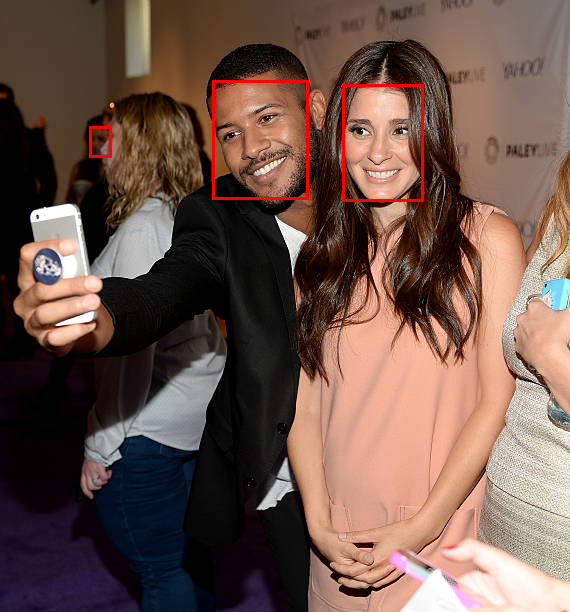

In [4]:
frame_draw = img.copy()
draw = ImageDraw.Draw(frame_draw)
for box in boxes:
    draw.rectangle(box, outline=(255, 0, 0), width=3) # box = (x1, y1, x2, y2)
frame_draw

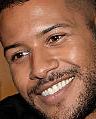

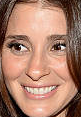

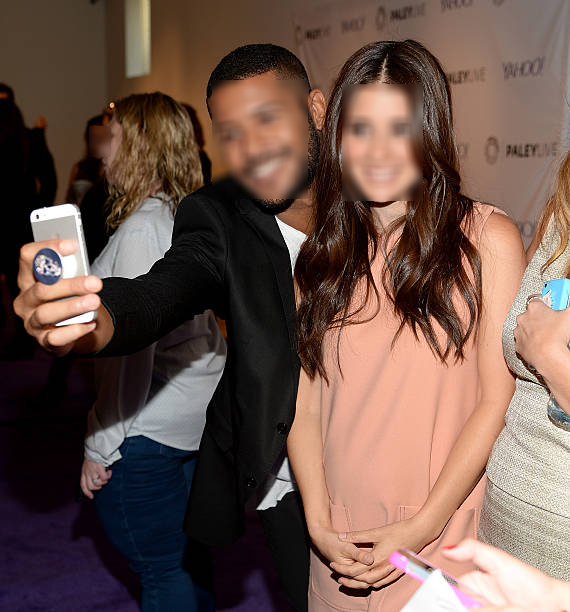

In [7]:
img_blurred = np.array(img.copy())
for box in boxes:
    x1, y1, x2, y2 = box
    face = img_blurred[y1:y2, x1:x2]
    face_img = Image.fromarray(face)
    display(face_img)
    pil_img = Image.fromarray(face)
    blurred_face = pil_img.filter(ImageFilter.BoxBlur(5))
    img_blurred[y1:y2, x1:x2] = np.array(blurred_face)
Image.fromarray(img_blurred)